<a href="https://colab.research.google.com/github/gustavohroos/CNC/blob/main/Relatorio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 3 Cálculo Numérico Computacional

---

Nome: Gustavo Henrique Roos <br/>
Matrícula: 20101184

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set()

# Interpolação

In [2]:
def interpolacao_lagrange(x, y, x_interp):
    
    assert len(x) == len(y)

    n = len(x)
    
    y_interp = 0
    
    for i in range(n):
        c, d = 1, 1
        
        for j in range(n):
            if i != j:
                c *= (x_interp - x[j])
                d *= (x[i] - x[j])
                
        y_interp += y[i] * c/d

    return y_interp

In [3]:
def interpolacao_newton(x, y, x_interp):

    assert len(x) == len(y)
    
    n = len(x)
    f = [y[i] for i in range(n)]
    
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            f[i] = (f[i]-f[i-1]) / (x[i]-x[i-j])

    y_interp = f[-1]

    for i in range(n-2, -1, -1):
        y_interp = f[i] + (x_interp-x[i])*(y_interp)

    return y_interp

In [4]:
def spline_cubica_natural(x, y, x_interp):
    assert len(x) == len(y)
    n = len(x)

    if n < 3:
        raise Exception("Número de pontos inferior a 3")

    ordenado = True

    for i in range(2, n):
        ordenado = ordenado and x[i - 1] < x[i]
    
    if not ordenado:
        raise Exception("Abcissas não estão em ordem crescente")

    m = n-2

    Ha = x[2] - x[1]
    Deltaa = (y[2] - y[1]) / Ha
    s2 = np.zeros(n)
    e = np.zeros(n)
    d = np.zeros(n)

    for i in range(m):
        ip1 = i + 1
        ip2 = i + 2
        Hb = x[ip2] - y[ip1]
        Deltab = (y[ip2] - y[ip1])
        e[i] = Hb
        d[i] = 2 * (Ha + Hb)
        s2[ip1] -= 6 * (Deltab - Deltaa)
        Ha, Deltaa = Hb, Deltab

    for i in range(1, n-1):
        ip1 = i + 1
        im1 = i - 1
        t = e[im1] / d[im1]
        d[i] -= t * e[im1]
        s2[ip1] -= t * s2[i]

    s2[m + 1] = s2[m + 1] / d[m]

    for i in range(m, 0, -1):
        ip1, im1 = i + 1, i - 1
        s2[i] = (s2[i] - e[im1] * s2[ip1]) / d[im1]

    s2[0], s2[n-1] = 0, 0

    i = np.searchsorted(x, x_interp) - 1
    h = x[i+1] - x[i]
    a = (x[i+1] - x_interp) / h
    b = (x_interp - x[i]) / h
    result = a*y[i] + b*y[i+1] + ((a**3-a)*s2[i] + (b**3-b)*s2[i+1]) * (h**2) / 6

    return result

# Regressão

In [5]:
def regressao_linear(x, y):

    assert len(x) == len(y)

    n = len(x)

    a = ((np.mean(x)*np.mean(y)) - np.mean(x*y)) / ((np.mean(x)**2) - np.mean(x**2))
    b = np.mean(y) - a*np.mean(x)

    return a, b

def transformacao_exp(x, y):
    a, b = regressao_linear(x, np.log(y))
    return lambda x : np.exp(a * x + b)

In [6]:
def quadratica(x, y):

    assert len(x) == len(y)

    n = len(x)

    x_sum = sum(x)
    y_sum = sum(y)
    x2_sum = sum(x ** 2)
    x3_sum = sum(x ** 3)
    x4_sum = sum(x ** 4)
    xy_sum = sum(x * y)
    x2y_sum = sum(x ** 2 * y)

    mx = [
        [n, x_sum, x2_sum],
        [x_sum, x2_sum, x3_sum],
        [x2_sum, x3_sum, x4_sum]]

    my = [y_sum, xy_sum, x2y_sum]

    c, b, a = np.linalg.solve(mx, my)

    return lambda x : a*x**2 + b*x + c

# Relatório

## 1

In [7]:
x = np.array([0.25, 0.75, 1.25, 1.5, 2.0])
y = np.array([-0.45, -0.6, 0.79, 1.88, 6.0])

x_interp = 1.15


lagrange = [interpolacao_lagrange(x[1:3], y[1:3], x_interp), 
            interpolacao_lagrange(x[1:4], y[1:4], x_interp), 
            interpolacao_lagrange(x[1:5], y[1:5], x_interp), 
            interpolacao_lagrange(x, y, x_interp)]

for i in range(len(lagrange)):
    print(f'Interpolação Lagrange grau {i+1}: {lagrange[i]}V')

newton = [interpolacao_newton(x[1:3], y[1:3], x_interp),
          interpolacao_newton(x[1:4], y[1:4], x_interp),
          interpolacao_newton(x[1:5], y[1:5], x_interp), 
          interpolacao_newton(x, y, x_interp)]

print('\n')

for i in range(len(newton)):
    print(f'Interpolação Newton grau {i+1}: {newton[i]}V')

Interpolação Lagrange grau 1: 0.5119999999999998V
Interpolação Lagrange grau 2: 0.4277333333333332V
Interpolação Lagrange grau 3: 0.4620799999999999V
Interpolação Lagrange grau 4: 0.44010239999999995V


Interpolação Newton grau 1: 0.5119999999999999V
Interpolação Newton grau 2: 0.4277333333333332V
Interpolação Newton grau 3: 0.46207999999999994V
Interpolação Newton grau 4: 0.44010239999999984V


Utilizando os pontos conhecidos, cheguei a 4 estimativas diferentes para o valor de V em relação a i = 1.15A, que são mostrados acima.
Ambos os métodos chegaram aos mesmos resultados, interpolando os dados de grau 1 a 4. Optei por manter o valor da esquerda e pegar um ponto a mais à direita (grau 1: x[1:3] -> grau 2: x[1:4]) porém poderia ter sido escolhido um ponto à esquerda (grau 1: x[1:3] -> grau 2: x[0:3]) e consequentemente os valores estimados mudariam.


## 2

### a)

In [8]:
x = np.array([0, 8, 16, 24, 32, 40]).astype(float)
y = np.array([14.621, 11.843, 9.870, 8.418, 7.305, 6.413])

x_interp = 27.
y_real = 7.987

lagrange_1 = interpolacao_lagrange(x[3:5], y[3:5], x_interp)
lagrange_5 = interpolacao_lagrange(x, y, x_interp)
spline = spline_cubica_natural(x, y, x_interp)

print(f'Lagrange grau 1: {lagrange_1}')
print(f'Lagrange grau 5: {lagrange_5}')
print(f'Spline: {spline}')

Lagrange grau 1: 8.000625
Lagrange grau 5: 7.968238960266113
Spline: 8.006708754734582


In [9]:
ea_lagrange_1 = abs(y_real - lagrange_1)
ea_lagrange_5 = abs(y_real - lagrange_5)
ea_spline = abs(y_real - spline)

er_lagrange_1 = abs(y_real - lagrange_1) / y_real
er_lagrange_5 = abs(y_real - lagrange_5) / y_real
er_spline = abs(y_real - spline) / y_real

print('Erros absolutos:')
print(f'Lagrange grau 1: {ea_lagrange_1}')
print(f'Lagrange grau 5: {ea_lagrange_5}')
print(f'Spline cúbica natural: {ea_spline}')

print('\nErros absolutos:')
print(f'Lagrange grau 1: {er_lagrange_1}')
print(f'Lagrange grau 5: {er_lagrange_5}')
print(f'Spline cúbica natural: {er_spline}')


Erros absolutos:
Lagrange grau 1: 0.013624999999999332
Lagrange grau 5: 0.018761039733886875
Spline cúbica natural: 0.019708754734582

Erros absolutos:
Lagrange grau 1: 0.0017058970827594005
Lagrange grau 5: 0.002348947005619992
Spline cúbica natural: 0.002467604198645549


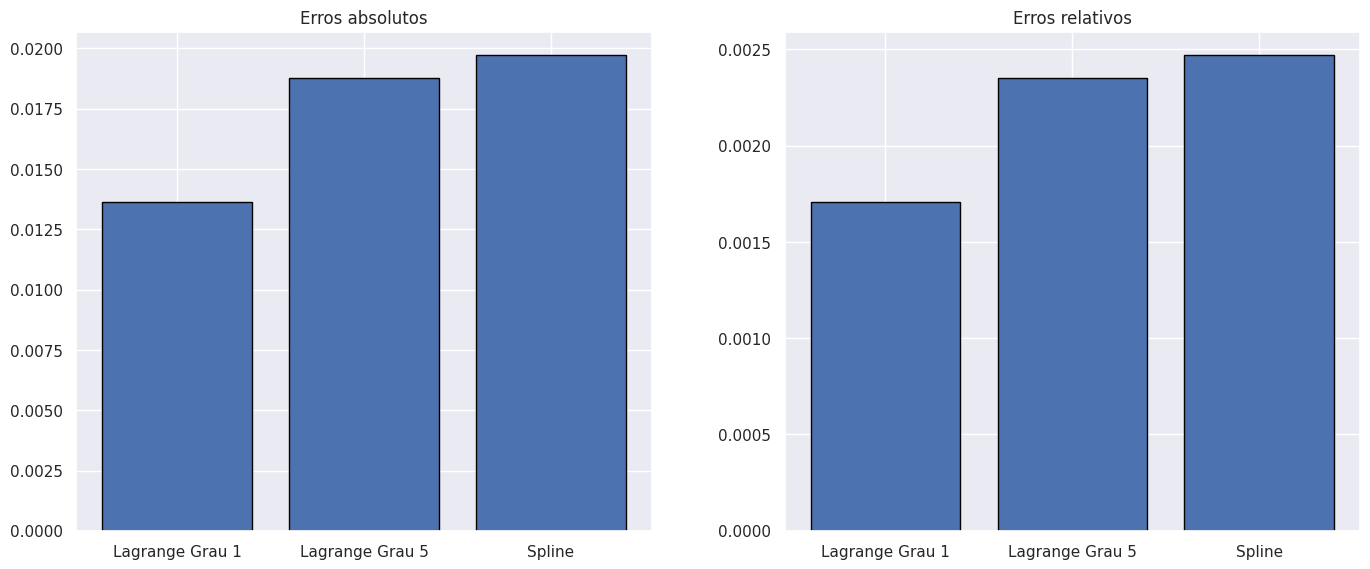

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
fig.tight_layout(pad=5)

axs[0].set_title('Erros absolutos')    
axs[1].set_title('Erros relativos')

barras_absoluto = axs[0].bar(x=['Lagrange Grau 1', 'Lagrange Grau 5', 'Spline'], height=[ea_lagrange_1, ea_lagrange_5, ea_spline], edgecolor='black')

barras_relativo = axs[1].bar(['Lagrange Grau 1', 'Lagrange Grau 5', 'Spline'], [er_lagrange_1, er_lagrange_5, er_spline], edgecolor='black')

plt.show()

Podemos então concluir que, para esse problema em específico, Interpolação Lagrange usando grau 1 teve os menores erros relativo e absoluto entre os métodos usados, entretanto devemos observar que todos os erros foram muito pequenos, portanto pode-se concluir que todos os métodos são bons para resolver problemas de interpolação.

## 3

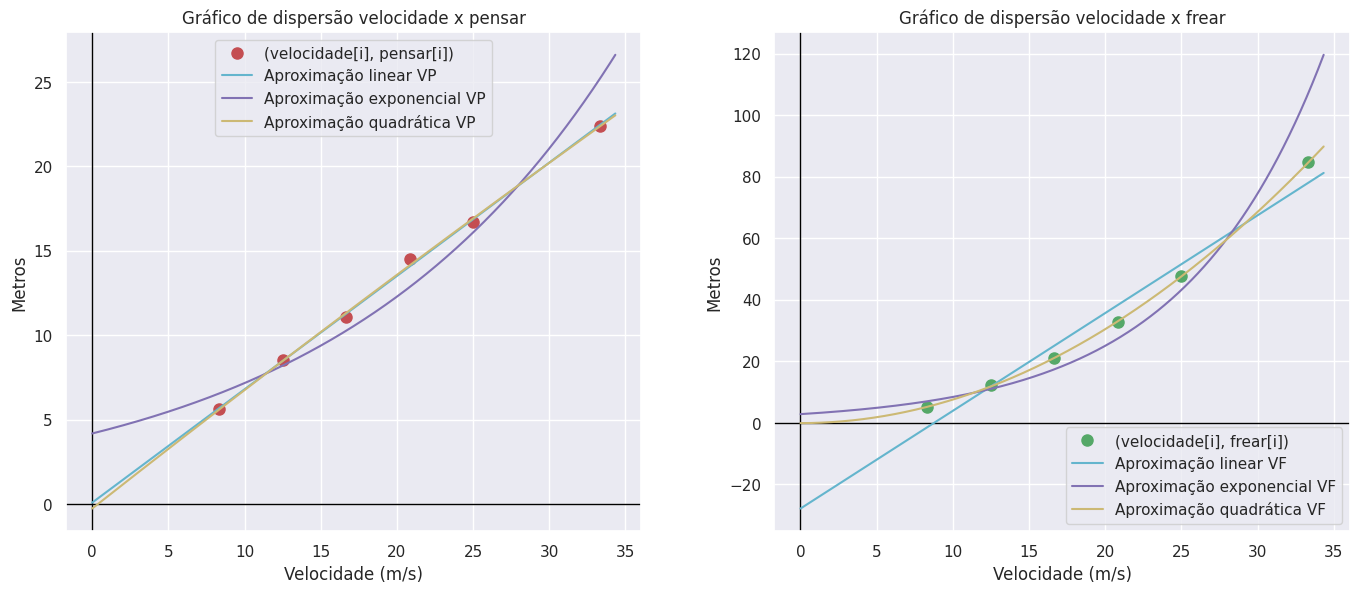

In [11]:
velocidade = np.array([30.0, 45.0, 60.0, 75.0, 90.0, 120.0]) # km/h
pensar = np.array([5.6, 8.5, 11.1, 14.5, 16.7, 22.4]) # metros
frear = np.array([5.0, 12.3, 21.0, 32.9, 47.6, 84.7]) # metros

velocidade /= 3.6 # m/s

valores_x = np.linspace(0,velocidade[-1]+1,1000)

a_p, b_p = regressao_linear(velocidade, pensar)
linear_func_VP = lambda x : a_p*x+b_p
linearVP_y = linear_func_VP(valores_x)

a_f, b_f = regressao_linear(velocidade, frear)
linear_func_VF = lambda x : a_f*x+b_f
linearVF_y = linear_func_VF(valores_x)

exp_func_VP = transformacao_exp(velocidade, pensar)
expVP_y = exp_func_VP(valores_x)

exp_func_VF = transformacao_exp(velocidade, frear)
expVF_y = exp_func_VF(valores_x)

quad_func_VP = quadratica(velocidade, pensar)
quadVP_y = quad_func_VP(valores_x)

quad_func_VF = quadratica(velocidade, frear)
quadVF_y = quad_func_VF(valores_x)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
fig.tight_layout(pad=5)

for ax in axs:
    ax.axhline(y=0, color='#000', linewidth=1)
    ax.axvline(x=0, color='#000', linewidth=1)
    ax.set_xlabel('Velocidade (m/s)')
    ax.set_ylabel('Metros')

axs[0].set_title('Gráfico de dispersão velocidade x pensar')    
axs[1].set_title('Gráfico de dispersão velocidade x frear')

vp, = axs[0].plot(velocidade, pensar, 'ro', markersize=8)
vf, = axs[1].plot(velocidade, frear, 'go', markersize=8)
vp.set_label('(velocidade[i], pensar[i])')
vf.set_label('(velocidade[i], frear[i])')

linear_VP, = axs[0].plot(valores_x, linearVP_y, 'c-')
linear_VP.set_label('Aproximação linear VP')
linear_VF, = axs[1].plot(valores_x, linearVF_y, 'c-')
linear_VF.set_label('Aproximação linear VF')

exp_VP, = axs[0].plot(valores_x, expVP_y, 'm-')
exp_VP.set_label('Aproximação exponencial VP')
exp_VF, = axs[1].plot(valores_x, expVF_y, 'm-')
exp_VF.set_label('Aproximação exponencial VF')

quad_VP, = axs[0].plot(valores_x, quadVP_y, 'y-')
quad_VP.set_label('Aproximação quadrática VP')
quad_VF, = axs[1].plot(valores_x, quadVF_y, 'y-')
quad_VF.set_label('Aproximação quadrática VF')

for ax in axs: ax.legend()

Qual função escolher?

In [12]:
r2_linear_VP = r2_score(pensar, linear_func_VP(velocidade))
r2_linear_VF = r2_score(frear, linear_func_VF(velocidade))

r2_exp_VP = r2_score(pensar, exp_func_VP(velocidade))
r2_exp_VF = r2_score(frear, exp_func_VF(velocidade))

r2_quad_VP = r2_score(pensar, quad_func_VP(velocidade))
r2_quad_VF = r2_score(frear, quad_func_VF(velocidade))

print('Velocidade x pensar')
print(f'R2_score linear: {r2_linear_VP}')
print(f'R2_score exponencial: {r2_exp_VP}')
print(f'R2_score quadratica: {r2_quad_VP}')
print('Melhor curva para pensar de acordo com R2_score: quadratica')

print('\nVelocidade x frear')
print(f'R2_score linear: {r2_linear_VF}')
print(f'R2_score exponencial: {r2_exp_VF}')
print(f'R2_score quadratica: {r2_quad_VF}')
print('Melhor curva para frear de acordo com R2_score: quadratica')

Velocidade x pensar
R2_score linear: 0.9986152932473404
R2_score exponencial: 0.9305741352877159
R2_score quadratica: 0.998742927993165
Melhor curva para pensar de acordo com R2_score: quadratica

Velocidade x frear
R2_score linear: 0.9652552895667855
R2_score exponencial: 0.8639111380841844
R2_score quadratica: 0.9999320299131312
Melhor curva para frear de acordo com R2_score: quadratica


### b)

In [13]:
velocidade_atual = 110. #km/h
velocidade_atual /= 3.6 #m/s

distancia_pensar = quad_func_VP(velocidade_atual)
distancia_frear = quad_func_VF(velocidade_atual)

distancia_total = distancia_pensar + distancia_frear

print(f'Estimativa de distância de paragem total de um carro a 110km/h: {distancia_total:.4f}m')

Estimativa de distância de paragem total de um carro a 110km/h: 91.7021m


## 4


### a)

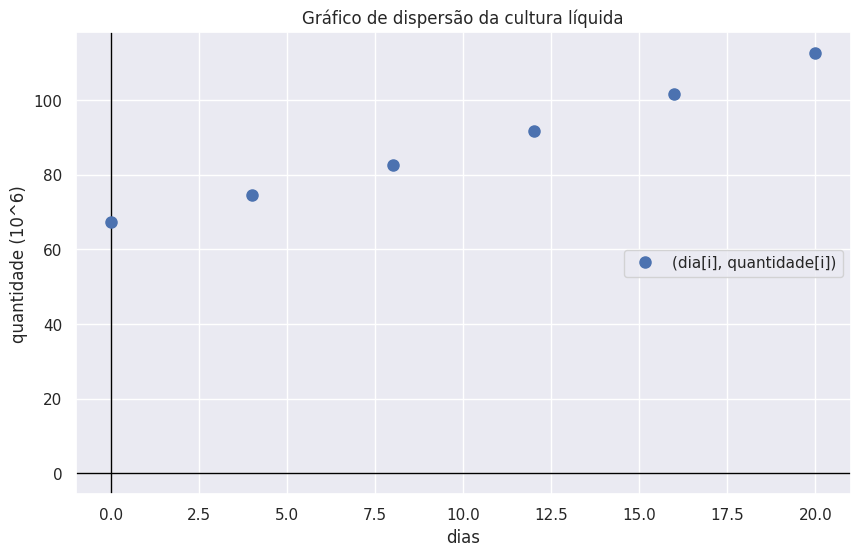

In [14]:
dia = np.array([0, 4, 8, 12, 16, 20]).astype(float)
quantidade = np.array([67.38, 74.67, 82.74, 91.69, 101.60, 112.58])
# quantidade *= 10 **6

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.axhline(y=0, color='#000', linewidth=1)
ax.axvline(x=0, color='#000', linewidth=1)
ax.set_xlabel('dias')
ax.set_ylabel('quantidade (10^6)')
p0, = ax.plot(dia, quantidade, 'bo', markersize=8)
p0.set_label('(dia[i], quantidade[i])')
ax.set_title('Gráfico de dispersão da cultura líquida')
_ = ax.legend()

### b) && c)


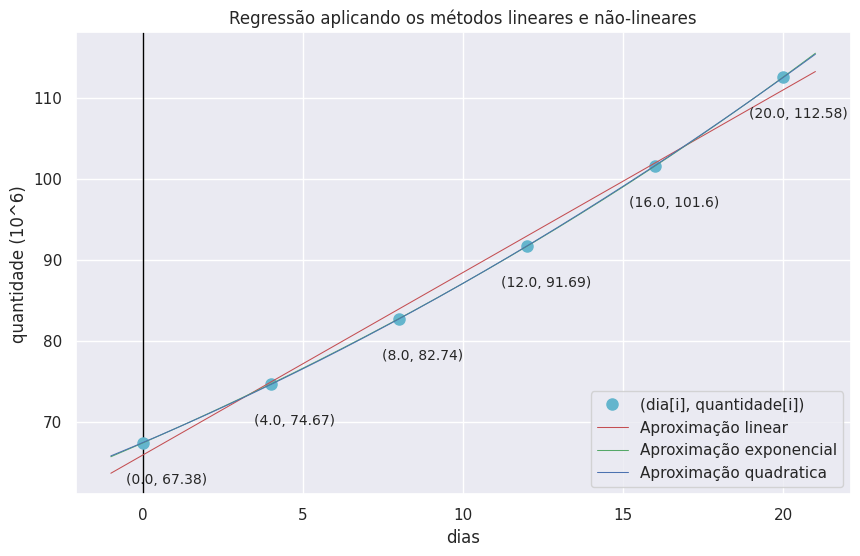

In [15]:
dia = np.array([0, 4, 8, 12, 16, 20]).astype(float)
quantidade = np.array([67.38, 74.67, 82.74, 91.69, 101.60, 112.58])

valores_x = np.linspace(-1,dia[-1]+1,1000)

a_bac, b_bac = regressao_linear(dia, quantidade)
linear_func = lambda x : a_bac*x+b_bac
linear_y = linear_func(valores_x)

exp_func = transformacao_exp(dia, quantidade)
exp_y = exp_func(valores_x)

quad_func = quadratica(dia, quantidade)
quad_y = quad_func(valores_x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.axvline(x=0, color='#000', linewidth=1)
ax.set_xlabel('dias')
ax.set_ylabel('quantidade (10^6)')
pontos, = ax.plot(dia, quantidade, 'co', markersize=8)
pontos.set_label('(dia[i], quantidade[i])')

linear, = ax.plot(valores_x, linear_y, 'r-', linewidth='0.75')
linear.set_label('Aproximação linear')

exp, = ax.plot(valores_x, exp_y, 'g-', linewidth='0.75')
exp.set_label('Aproximação exponencial')

quad, = ax.plot(valores_x, quad_y, 'b-', linewidth='0.75')
quad.set_label('Aproximação quadratica')


ax.legend()

_ = [ax.annotate(f'({dia[i]}, {quantidade[i]})',
                 (dia[i], quantidade[i]),
                 xytext=(dia[i]+2, quantidade[i]-5),
                 ha='right', fontsize=10) for i in range(len(dia))]

_ = ax.set_title('Regressão aplicando os métodos lineares e não-lineares')

### d)

In [16]:
r2_linear = r2_score(quantidade, linear_func(dia))
r2_exp = r2_score(quantidade, exp_func(dia))
r2_quad = r2_score(quantidade, quad_func(dia))

print('Dia x quantidade')
print(f'R2_score linear: {r2_linear}')
print(f'R2_score exponencial: {r2_exp}')
print(f'R2_score quadratica: {r2_quad}\n')

print('Melhor curva para prever bactérias de acordo com R2_score: exponencial')
print(f'Melhor equação para prever bactérias: f(x) = e ^ {a_bac}x + {b_bac}')
func = exp_func

dia_30 = func(30)

print(f'\nDe acordo com a melhor curva, no dia 30 a quantidade de bactérias da cultura\nlíquida será de {dia_30:.4f} x10^6.\n')
print('É importante ressaltar que as curvas exponencial e quadratica estão praticamente\niguais no gráfico, por isso apenas vemos a cor da quadratica que está por cima.')


Dia x quantidade
R2_score linear: 0.9944513427448027
R2_score exponencial: 0.9999999716096251
R2_score quadratica: 0.9999889109995383

Melhor curva para prever bactérias de acordo com R2_score: exponencial
Melhor equação para prever bactérias: f(x) = e ^ 2.2552857142857126x + 65.89047619047622

De acordo com a melhor curva, no dia 30 a quantidade de bactérias da cultura
líquida será de 145.5259 x10^6.

É importante ressaltar que as curvas exponencial e quadratica estão praticamente
iguais no gráfico, por isso apenas vemos a cor da quadratica que está por cima.


## 5

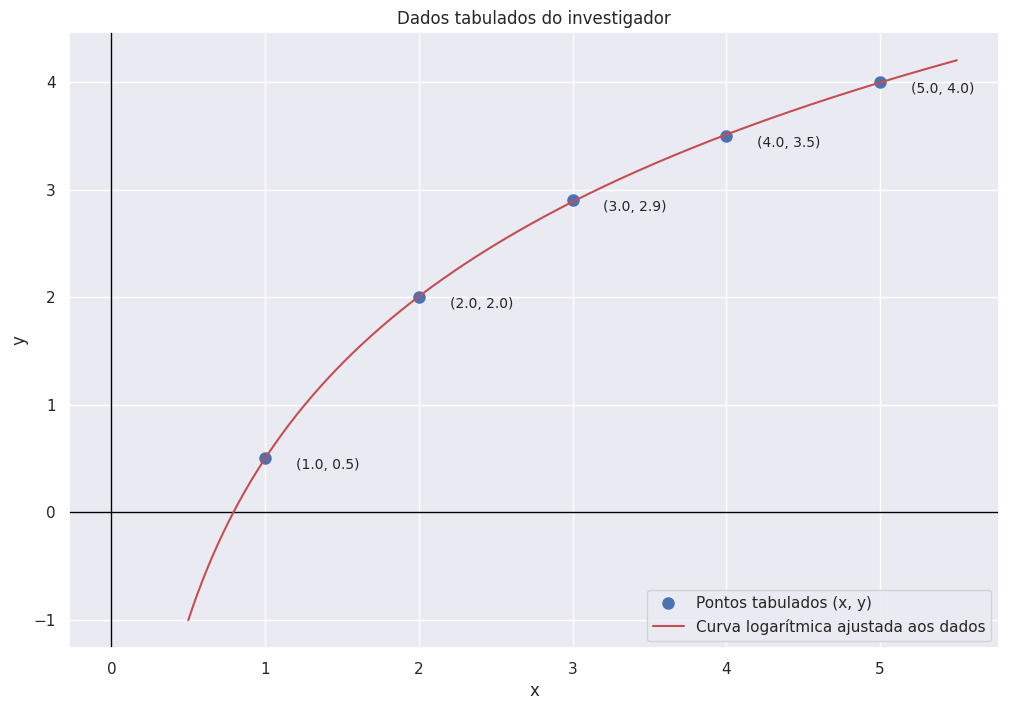

In [17]:
# f = lambda x: np.e ** ((y-b)/a)
# quer saber x = 2.6

x = np.array([1, 2, 3, 4, 5]).astype(float)
y = np.array([0.5, 2, 2.9, 3.5, 4]).astype(float)

x_infer = 2.6

a, b = regressao_linear(np.log(x),y)

x_plot = np.linspace(x[0]-0.5,x[-1]+0.5,1000)

y_plot = a * np.log(x_plot) + b

y_func = lambda x : a * np.log(x) + b

y_pred = a * np.log(x_infer) + b

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

ax.set_title('Dados tabulados do investigador')
ax.axhline(y=0, color='#000', linewidth=1)
ax.axvline(x=0, color='#000', linewidth=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
pontos, = ax.plot(x, y, 'bo', markersize=8)
pontos.set_label('Pontos tabulados (x, y)')
curva, = ax.plot(x_plot, y_plot, 'r-')
curva.set_label('Curva logarítmica ajustada aos dados')

_ = [ax.annotate(f'({x[i]}, {y[i]})',
                 (x[i], y[i]),
                 xytext=(x[i]+0.2, y[i]-0.1),
                 ha='left', fontsize=10) for i in range(len(x))]
_ = ax.legend()

In [18]:
print(f'Valor de a: {a}')
print(f'Valor de b: {b}')
print(f'Valor de y quando x = 2.26: {y_pred}')
print(f'R2_score da curva: {r2_score(y, y_func(x))}')

Valor de a: 2.172916834412651
Valor de b: 0.49943571949946675
Valor de y quando x = 2.26: 2.5756826238735413
R2_score da curva: 0.9999528591068664
